In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rc('font', family="Cambria")

#! 根据模型修改
# ppi, ppi-woppm, rnn, rnn-woppm
model_name = "ppi"

In [8]:
results_dir = f"./results/{model_name}"
values = []
errors = []
layers_num = len(os.listdir(results_dir))
for fn in ['emb'] + list(range(layers_num-1)):
    line = open(os.path.join(results_dir, f"{str(fn)}"+".eval"), "r").readline()
    avg, std, _min, _max = line.strip().split()
    values.append(float(avg))
    errors.append(float(std))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.406-0.016
0.41-0.005
0.421-0.013
0.427-0.016
0.421-0.013
0.433-0.005
0.422-0.014
0.423-0.008
0.423-0.004
0.431-0.018


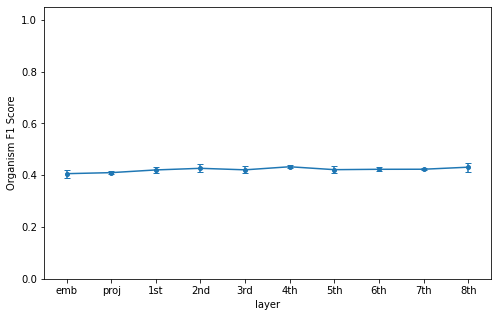

In [10]:
# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(8, 5))
fig = plt.subplot()

xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]
colors = ["#407088", "#a37eba"]

xs = xs[:layers_num]
xticks = xticks[:layers_num]
xlim = layers_num + 0.5

for idx in range(len(values)):
    print(f"{round(values[idx], 3)}-{round(errors[idx], 3)}")


fig.set_xlim(0.5, xlim, 1)
fig.set_ylim(0, 1.05)
fig.set_xlabel("layer")
fig.set_ylabel("Organism F1 Score")
fig.set_xticks(range(1, layers_num+1), xticks)

fig.errorbar(xs, values, yerr=errors, capsize=3, marker="o", ms=4)
fig.legend(frameon=False)
    
plt.savefig(f"./figure-{model_name}.pdf", bbox_inches='tight')